In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [19]:
path1 = 'data/processed/india_ev_stations_cleaned.csv'

In [20]:
import kagglehub

# Download latest version
path2 = kagglehub.dataset_download("mafzal19/electric-vehicle-sales-by-state-in-india")

print("Path to dataset files:", path2)

Path to dataset files: C:\Users\gryff\.cache\kagglehub\datasets\mafzal19\electric-vehicle-sales-by-state-in-india\versions\1


In [21]:
ev_charging_stations = pd.read_csv(path1)
ev_charging_stations.head()

,AddressInfo.Title,AddressInfo.Latitude,AddressInfo.Longitude,State,City,Max_Power_KW
0,Poojari’s Nirantara,12.141240,76.508540,Karnataka,Mysuru,30.0
1,Annai Ananda Bhavan Restaurant,12.125020,78.135150,Tamil Nadu,A.Reddihalli,60.0
2,Nest Homestay EVOK | Adimali,10.017258,77.000660,Kerala,Adimali,30.0
3,EQ Kalayil EVCS | Adoor,9.147193,76.732401,Kerala,Adoor,30.0
4,JB Power EVCS - GO EC,9.116847,76.745112,Kerala,Adoor,60.0


In [6]:
ev_sales = pd.read_csv(str(path2) + "/EV_Dataset.csv")
ev_sales.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


## Data Exploration and Cleaning

In [22]:
print("EV Charging Stations Dataset Info:")
print(ev_charging_stations.info())
print("\nMissing values:")
print(ev_charging_stations.isnull().sum())

EV Charging Stations Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AddressInfo.Title      967 non-null    object 
 1   AddressInfo.Latitude   967 non-null    float64
 2   AddressInfo.Longitude  967 non-null    float64
 3   State                  967 non-null    object 
 4   City                   967 non-null    object 
 5   Max_Power_KW           967 non-null    float64
dtypes: float64(3), object(3)
memory usage: 45.5+ KB
None

Missing values:
AddressInfo.Title        0
AddressInfo.Latitude     0
AddressInfo.Longitude    0
State                    0
City                     0
Max_Power_KW             0
dtype: int64


In [9]:
print("EV Sales Dataset Info:")
print(ev_sales.info())
print("\nMissing values:")
print(ev_sales.isnull().sum())

EV Sales Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB
None

Missing values:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [10]:
ev_sales = ev_sales.dropna()
print("\nMissing values after cleaning:")
print(ev_sales.isnull().sum())


Missing values after cleaning:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [24]:
# Clean and preprocess charging stations data
print("Original charging stations shape:", ev_charging_stations.shape)

# Check for duplicates
print("Duplicate rows:", ev_charging_stations.duplicated().sum())

Original charging stations shape: (967, 6)
Duplicate rows: 0


In [ ]:
# Clean state names (remove extra spaces, standardize)
ev_charging_stations['State'] = ev_charging_stations['State'].str.strip().str.title()

# Check unique states and cities
print("\nUnique states:", ev_charging_stations['State'].nunique())
print("States:", sorted(ev_charging_stations['State'].unique()))

print("\nUnique cities:", ev_charging_stations['City'].nunique())
print("Sample cities:", sorted(ev_charging_stations['City'].unique())[:10])


Unique states: 16
States: ['Andhra Pradesh', 'Assam', 'Delhi', 'Gujarat', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Puducherry', 'Rajasthan', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

Unique cities: 482
Sample cities: ['A.Reddihalli', 'Adimali', 'Adoor', 'Agra', 'Ahmednagar', 'Aikkarapadi', 'Aimangala', 'Alappuzha', 'Alathur', 'Alliyar']

Power distribution:
count        967.000000
mean        1079.999380
std        32156.387513
min            0.000000
25%           30.000000
50%           30.000000
75%           60.000000
max      1000000.000000
Name: Max_Power_KW, dtype: float64


In [15]:
# Clean and preprocess EV sales data
print("Original EV sales shape:", ev_sales.shape)

# Check for duplicates
print("Duplicate rows:", ev_sales.duplicated().sum())

Original EV sales shape: (96845, 8)
Duplicate rows: 0


In [16]:
# Clean state names
ev_sales['State'] = ev_sales['State'].str.strip().str.title()

# Convert date column
ev_sales['Date'] = pd.to_datetime(ev_sales['Date'], errors='coerce')
ev_sales['Year'] = ev_sales['Year'].fillna(0).astype(int)
ev_sales['Month'] = pd.to_datetime(ev_sales['Month_Name'], format='%b', errors='coerce').dt.month
ev_sales['Month'] = ev_sales['Month'].fillna(1).astype(int)

# Filter out zero sales and focus on relevant vehicle categories
ev_sales_clean = ev_sales[ev_sales['EV_Sales_Quantity'] > 0].copy()

# Focus on main vehicle categories
main_categories = ['2-Wheelers', '3-Wheelers', '4-Wheelers', 'Bus']
ev_sales_clean = ev_sales_clean[ev_sales_clean['Vehicle_Category'].isin(main_categories)]

print("\nCleaned EV sales shape:", ev_sales_clean.shape)
print("Year range:", ev_sales_clean['Year'].min(), "-", ev_sales_clean['Year'].max())
print("States:", sorted(ev_sales_clean['State'].unique()))
print("Vehicle categories:", ev_sales_clean['Vehicle_Category'].value_counts())


Cleaned EV sales shape: (12940, 9)
Year range: 2014 - 2024
States: ['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Dnh And Dd', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Vehicle categories: Vehicle_Category
3-Wheelers    5806
2-Wheelers    4407
4-Wheelers    2409
Bus            318
Name: count, dtype: int64


In [27]:
ev_charging_stations['State'] = ev_charging_stations['State'].str.strip().str.title()
ev_sales_clean['State'] = ev_sales_clean['State'].str.strip().str.title()

In [28]:
station_states = set(ev_charging_stations['State'].unique())
sales_states = set(ev_sales['State'].unique())
print(f"\nStates in stations but not in sales: {station_states - sales_states}")
print(f"States in sales but not in stations: {sales_states - station_states}")


States in stations but not in sales: {'Telangana'}
States in sales but not in stations: {'Sikkim', 'Punjab', 'Odisha', 'Nagaland', 'Chhattisgarh', 'Chandigarh', 'Mizoram', 'Dnh And Dd', 'Goa', 'Manipur', 'Himachal Pradesh', 'Meghalaya', 'Jammu And Kashmir', 'Tripura', 'Arunachal Pradesh', 'Bihar', 'Andaman & Nicobar Island', 'Haryana', 'Ladakh'}


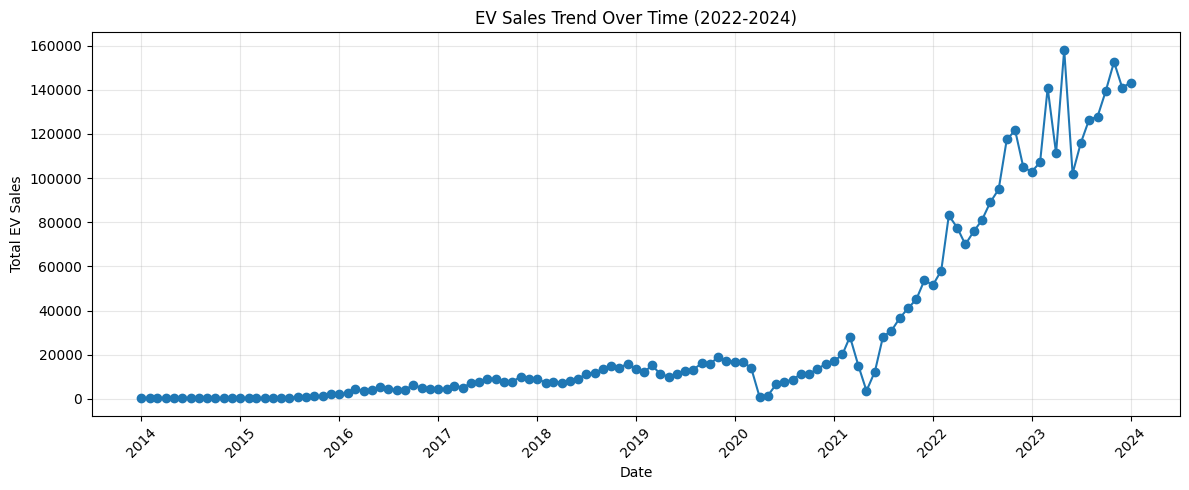

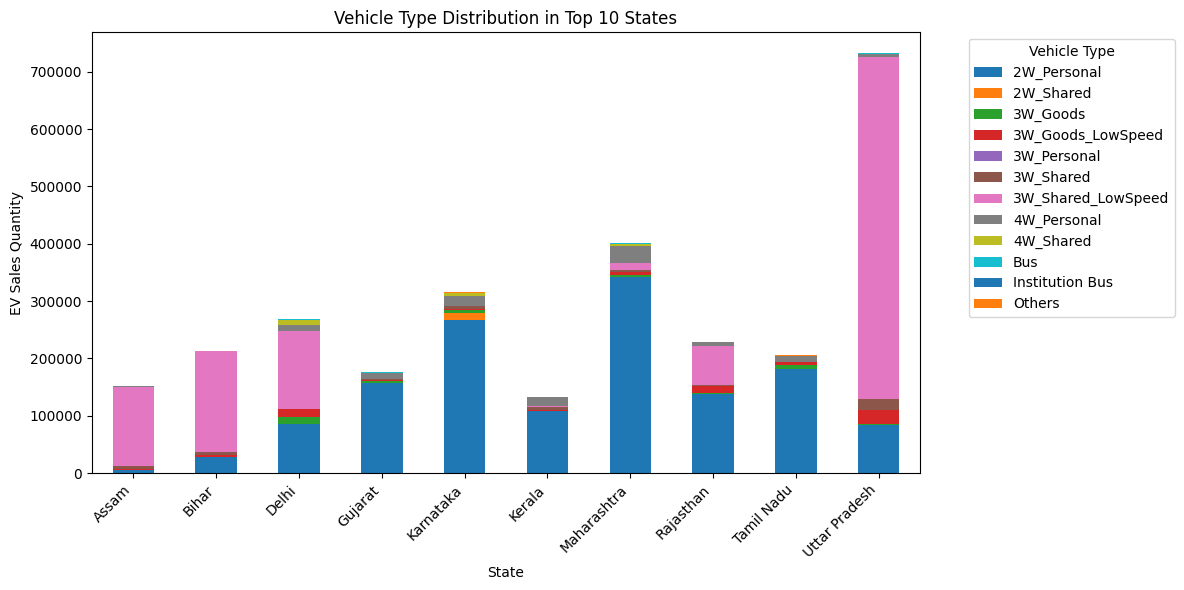

In [29]:
# Temporal trends in EV sales
ev_sales_temporal = ev_sales.groupby(['Year', 'Month'])['EV_Sales_Quantity'].sum().reset_index()
ev_sales_temporal['Date'] = pd.to_datetime(ev_sales_temporal[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(12, 5))
plt.plot(ev_sales_temporal['Date'], ev_sales_temporal['EV_Sales_Quantity'], marker='o')
plt.title('EV Sales Trend Over Time (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Vehicle type distribution by state (for top states)
top_states = ev_sales.groupby('State')['EV_Sales_Quantity'].sum().nlargest(10).index
vehicle_type_dist = ev_sales[ev_sales['State'].isin(top_states)].groupby(['State', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
vehicle_type_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Vehicle Type Distribution in Top 10 States')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Aggregate charging stations by state
stations_by_state = ev_charging_stations.groupby('State').agg({
    'AddressInfo.Title': 'count',
    'Max_Power_KW': 'sum'
}).rename(columns={'AddressInfo.Title': 'Station_Count'}).reset_index()

print("Charging stations by state:")
print(stations_by_state.sort_values('Station_Count', ascending=False))

# Aggregate EV sales by state (using recent years for current demand)
recent_years = [2022, 2023, 2024]
ev_sales_by_state = ev_sales_clean[ev_sales_clean['Year'].isin(recent_years)].groupby('State')['EV_Sales_Quantity'].sum().reset_index()

print("\nEV sales by state (2022-2024):")
print(ev_sales_by_state.sort_values('EV_Sales_Quantity', ascending=False).head(10))

# Merge datasets for gap analysis
gap_analysis = pd.merge(stations_by_state, ev_sales_by_state, on='State', how='outer')

# Fill missing values
gap_analysis['Station_Count'] = gap_analysis['Station_Count'].fillna(0)
gap_analysis['Max_Power_KW'] = gap_analysis['Max_Power_KW'].fillna(0)
gap_analysis['EV_Sales_Quantity'] = gap_analysis['EV_Sales_Quantity'].fillna(0)

# Calculate key metrics
gap_analysis['Stations_per_1000_EV'] = (gap_analysis['Station_Count'] / gap_analysis['EV_Sales_Quantity'] * 1000).replace([np.inf, -np.inf], 0)
gap_analysis['kW_per_1000_EV'] = (gap_analysis['Max_Power_KW'] / gap_analysis['EV_Sales_Quantity'] * 1000).replace([np.inf, -np.inf], 0)

# Calculate charging gap score (inverse of stations per EV, normalized)
gap_analysis['Charging_Gap_Score'] = 1 / (gap_analysis['Stations_per_1000_EV'] + 0.1)  # Add 0.1 to avoid division by zero

print("Demand-Supply Gap Analysis:")
print(gap_analysis.sort_values('Charging_Gap_Score', ascending=False).round(2))

Charging stations by state:
             State  Station_Count  Max_Power_KW
6           Kerala            498       19953.0
5        Karnataka            266       14507.4
11      Tamil Nadu            134     1005239.0
14     Uttarakhand             14         617.0
7   Madhya Pradesh              9         570.0
3          Gujarat              8         420.0
8      Maharashtra              8         331.0
13   Uttar Pradesh              8        1749.0
15     West Bengal              6         205.0
10       Rajasthan              5         240.0
0   Andhra Pradesh              3         210.0
2            Delhi              2          75.0
4        Jharkhand              2          55.0
12       Telangana              2         140.0
1            Assam              1          24.0
9       Puducherry              1          24.0

EV sales by state (2022-2024):
             State  EV_Sales_Quantity
30   Uttar Pradesh           467843.0
19     Maharashtra           348151.0
15       K

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Only normalize if there's variation in the data
if gap_analysis['EV_Sales_Quantity'].std() > 0:
    gap_analysis['EV_Sales_Normalized'] = scaler.fit_transform(gap_analysis[['EV_Sales_Quantity']])
else:
    gap_analysis['EV_Sales_Normalized'] = 0

if gap_analysis['Stations_per_1000_EV'].std() > 0:
    gap_analysis['Station_Density_Normalized'] = scaler.fit_transform(gap_analysis[['Stations_per_1000_EV']])
else:
    gap_analysis['Station_Density_Normalized'] = 0

# Simplified gap score (60-40 split)
gap_analysis['Charging_Gap_Score'] = (
    gap_analysis['EV_Sales_Normalized'] * 0.6 +  # 60% weight to demand
    (1 - gap_analysis['Station_Density_Normalized']) * 0.4  # 40% weight to infrastructure deficit
)

# Add priority categories
gap_analysis['Priority'] = pd.cut(
    gap_analysis['Charging_Gap_Score'], 
    bins=[0, 0.3, 0.6, 1.0], 
    labels=['Low', 'Medium', 'High']
)

print("\n=== Enhanced Gap Analysis ===")
print(gap_analysis[['State', 'Station_Count', 'EV_Sales_Quantity', 'Stations_per_1000_EV', 'Charging_Gap_Score', 'Priority']].sort_values('Charging_Gap_Score', ascending=False).head(15))


=== Enhanced Gap Analysis ===
             State  Station_Count  EV_Sales_Quantity  Stations_per_1000_EV  \
31   Uttar Pradesh            8.0           467843.0              0.017100   
19     Maharashtra            8.0           348151.0              0.022979   
15       Karnataka          266.0           261095.0              1.018786   
27       Rajasthan            5.0           179351.0              0.027878   
10         Gujarat            8.0           163429.0              0.048951   
4            Bihar            0.0           152279.0              0.000000   
7            Delhi            2.0           142454.0              0.014040   
3            Assam            1.0           105754.0              0.009456   
18  Madhya Pradesh            9.0           110517.0              0.081435   
28      Tamil Nadu          134.0           165261.0              0.810839   
24          Odisha            0.0            77347.0              0.000000   
6     Chhattisgarh            0.0

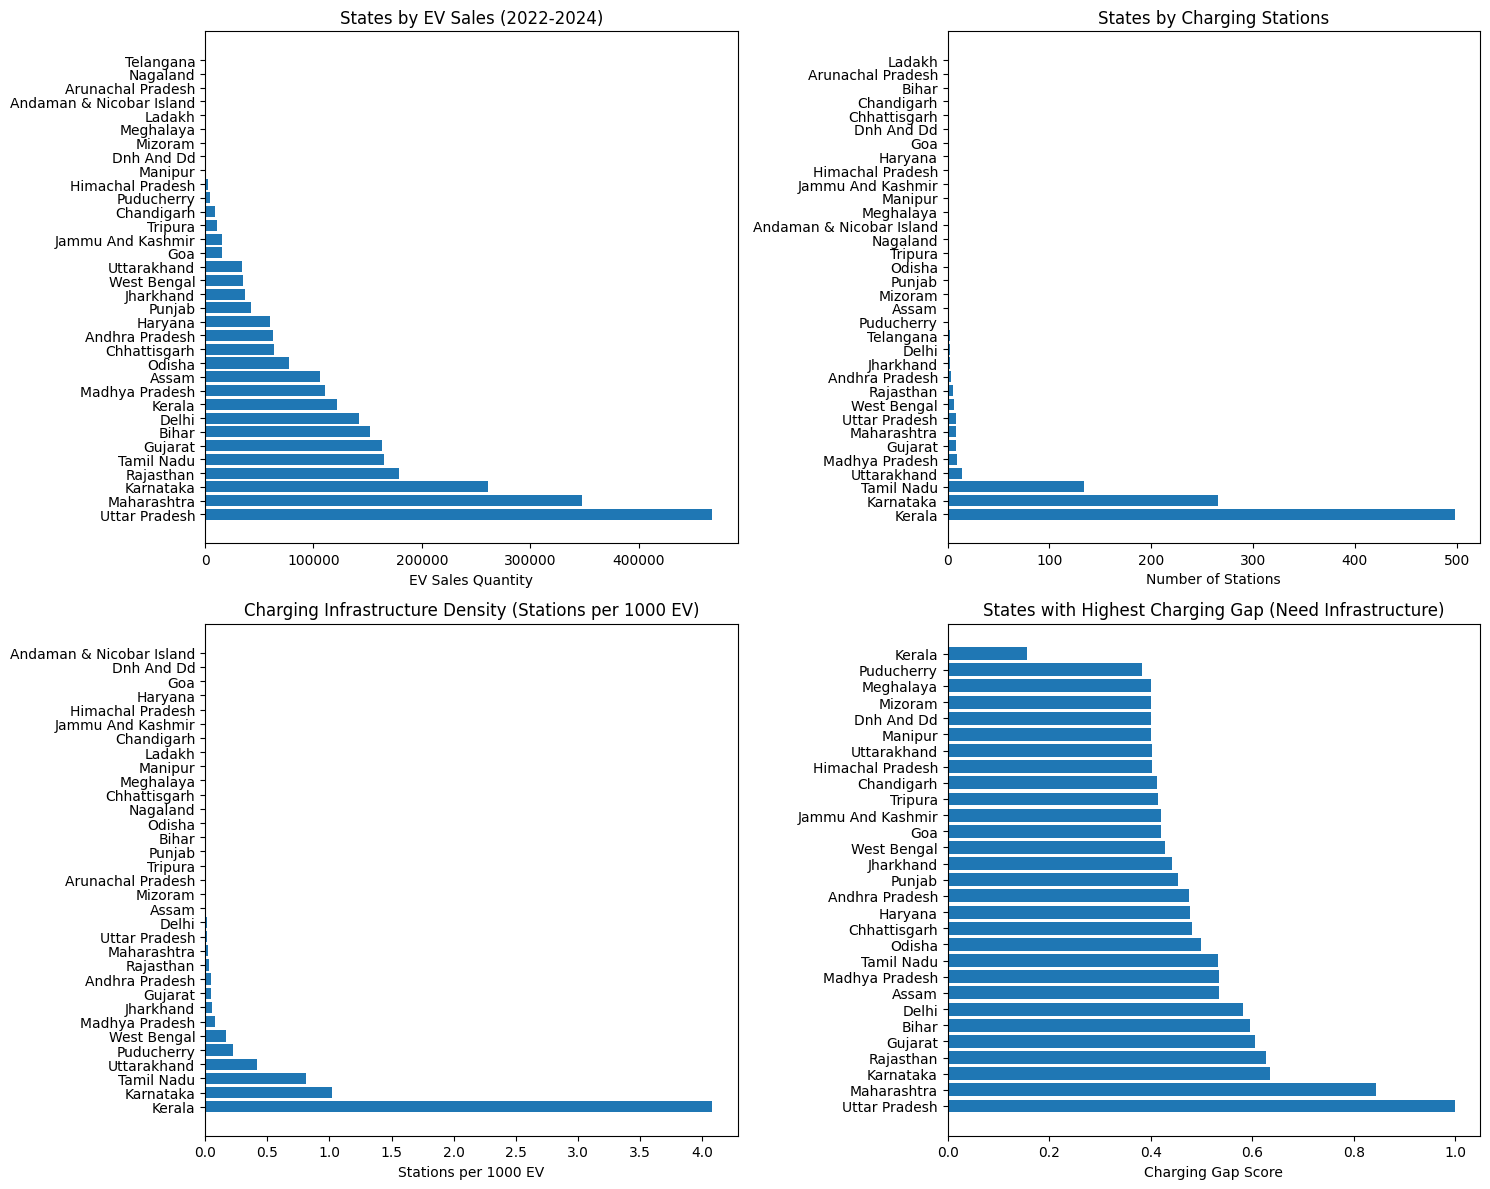

In [33]:
# Visualize the gap analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Top 10 states by EV sales
top_ev_states = gap_analysis.sort_values('EV_Sales_Quantity', ascending=False)
ax1.barh(top_ev_states['State'], top_ev_states['EV_Sales_Quantity'])
ax1.set_title('States by EV Sales (2022-2024)')
ax1.set_xlabel('EV Sales Quantity')

# Top 10 states by charging stations
top_station_states = gap_analysis.sort_values('Station_Count', ascending=False)
ax2.barh(top_station_states['State'], top_station_states['Station_Count'])
ax2.set_title('States by Charging Stations')
ax2.set_xlabel('Number of Stations')

# Stations per 1000 EV 
gap_sorted = gap_analysis[gap_analysis['EV_Sales_Quantity'] > 0].sort_values('Stations_per_1000_EV', ascending=False)
ax3.barh(gap_sorted['State'], gap_sorted['Stations_per_1000_EV'])
ax3.set_title('Charging Infrastructure Density (Stations per 1000 EV)')
ax3.set_xlabel('Stations per 1000 EV')

# Charging Gap Score (highest need)
high_need_states = gap_analysis[gap_analysis['EV_Sales_Quantity'] > 100].sort_values('Charging_Gap_Score', ascending=False)
ax4.barh(high_need_states['State'], high_need_states['Charging_Gap_Score'])
ax4.set_title('States with Highest Charging Gap (Need Infrastructure)')
ax4.set_xlabel('Charging Gap Score')

plt.tight_layout()
plt.show()

In [ ]:
# Enhanced summary with more context
detailed_summary = gap_analysis[[
    'State', 
    'Station_Count', 
    'EV_Sales_Quantity', 
    'Stations_per_1000_EV',
    'EV_Sales_Normalized',
    'Station_Density_Normalized',
    'Charging_Gap_Score', 
    'Priority'
]].sort_values('Charging_Gap_Score', ascending=False)

# Add interpretation column
def interpret_gap(row):
    if row['Priority'] == 'High':
        return 'Urgent: High demand, low infrastructure'
    elif row['Priority'] == 'Medium':
        return 'Moderate: Balanced growth needed'
    else:
        return 'Adequate: Well-served or low demand'

detailed_summary['Interpretation'] = detailed_summary.apply(interpret_gap, axis=1)

print("\n=== DETAILED SUMMARY (TOP 20) ===")
print(detailed_summary.head(20).to_string(index=False))

# Save detailed version
detailed_summary.to_csv('data/processed/detailed_gap_analysis.csv', index=False)
print("\n✓ Detailed analysis saved to 'detailed_gap_analysis.csv'")


=== DETAILED SUMMARY (TOP 20) ===
            State  Station_Count  EV_Sales_Quantity  Stations_per_1000_EV  EV_Sales_Normalized  Station_Density_Normalized  Charging_Gap_Score Priority                          Interpretation
    Uttar Pradesh            8.0           467843.0              0.017100             1.000000                    0.004192            0.998323     High Urgent: High demand, low infrastructure
      Maharashtra            8.0           348151.0              0.022979             0.744162                    0.005633            0.844244     High Urgent: High demand, low infrastructure
        Karnataka          266.0           261095.0              1.018786             0.558083                    0.249738            0.634954     High Urgent: High demand, low infrastructure
        Rajasthan            5.0           179351.0              0.027878             0.383357                    0.006834            0.627281     High Urgent: High demand, low infrastructure
     

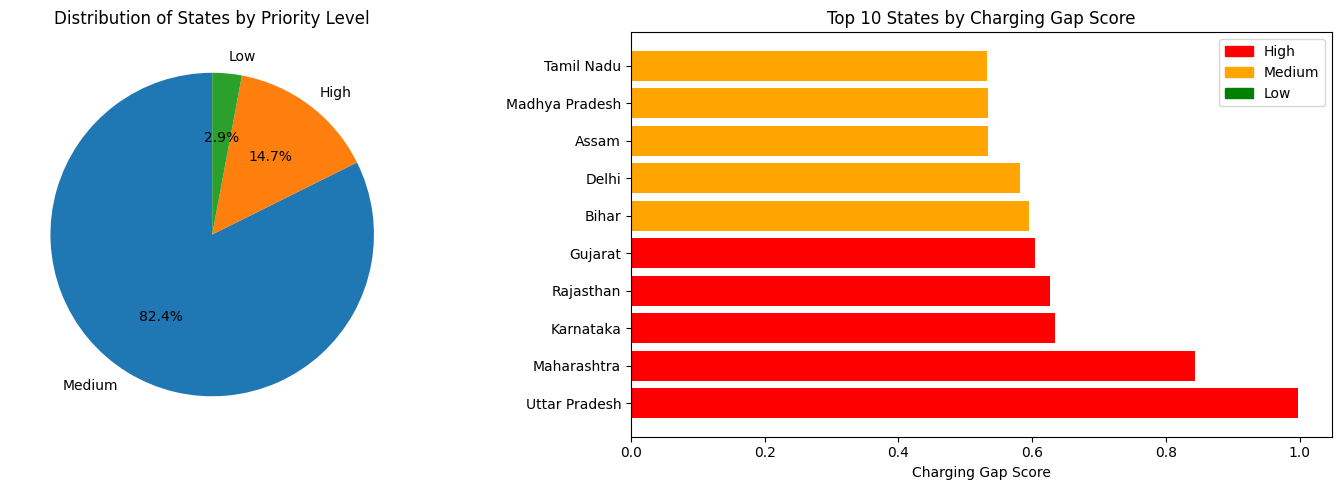

In [35]:
# Summary visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Priority distribution
priority_counts = gap_analysis['Priority'].value_counts()
ax1.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of States by Priority Level')

# Top 10 gap scores
top_10_gap = gap_analysis.nlargest(10, 'Charging_Gap_Score')
colors = top_10_gap['Priority'].map({'High': 'red', 'Medium': 'orange', 'Low': 'green'})
ax2.barh(top_10_gap['State'], top_10_gap['Charging_Gap_Score'], color=colors)
ax2.set_xlabel('Charging Gap Score')
ax2.set_title('Top 10 States by Charging Gap Score')
ax2.legend(handles=[
    plt.Rectangle((0,0),1,1, color='red', label='High'),
    plt.Rectangle((0,0),1,1, color='orange', label='Medium'),
    plt.Rectangle((0,0),1,1, color='green', label='Low')
])

plt.tight_layout()
plt.show()